# Hypothesis 1

There is a relation between EEG signal and 3 levels of stress.

For each pair of person and task, there are 3 distinct groups of EEG signals representing the 3 levels of stress.

In [1]:
from utils import *
import pandas as pd
import mne
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
markers = ['math,LowStress,start',
            'math,LowStress,T',
            'math,LowStress,F',
            'math,LowStress,S',
            'math,MildStress,start',
            'math,MildStress,T',
            'math,MildStress,F',
            'math,MildStress,S',
            'math,HigherStress,start',
            'math,HigherStress,T',
            'math,HigherStress,F',
            'math,HigherStress,S',
            'fixation,None,None']

In [12]:
task = "mathcontrol" 
# task = "mathstress"

files = glob(f"data/*_{task}_*.csv")
names = []
pd_raws = []
for f in files:
    name, task, t_stamp = f.split('/')[1].split('_')
    names.append(name)
    pd_raw = pd.read_csv(f, dtype={'Marker':str})
print(names)

['nuttasit', 'nutcha', 'krittithee', 'surangrat', 'dusadee', 'prin', 'pumpath']
['data/nuttasit_mathcontrol_2021-08-12-07.51.14.csv', 'data/nutcha_mathcontrol_2021-08-10-12.00.36.csv', 'data/krittithee_mathcontrol_2021-08-13-04.23.39.csv', 'data/surangrat_mathcontrol_2021-08-12-04.52.16.csv', 'data/dusadee_mathcontrol_2021-08-12-06.23.55.csv', 'data/prin_mathcontrol_2021-08-13-06.18.47.csv', 'data/pumpath_mathcontrol_2021-08-12-03.03.11.csv']


In [3]:
participant_name = "dusadee"
t
files = glob(f"data/{participant_name}_{task}_*.csv")
if(len(files) != 1):
    raise ValueError(f"glob found these files. {files}")

pandasRaw = pd.read_csv(files[0], dtype={'Marker':str})
pandasRaw,marker_idx = marker_converter(pandasRaw)
pandasRaw

,Fp1,Fp2,F3,F4,F7,F8,O1,O2,Marker
0,26076.887,22321.859,17087.439,24908.494,11652.367,16145.648,21130.199,19627.045,0
1,26084.598,22319.111,17085.428,24914.104,11655.831,16152.689,21133.730,19627.246,0
2,26086.072,22314.619,17084.936,24920.922,11663.878,16156.757,21138.738,19626.709,0
3,26076.484,22311.936,17085.002,24925.303,11674.070,16151.460,21132.479,19626.129,0
4,26085.268,22315.758,17078.879,24924.297,11691.706,16146.229,21134.760,19628.945,0
...,...,...,...,...,...,...,...,...,...
252967,26027.020,21899.145,18082.404,25975.029,14338.019,16915.666,22777.971,21120.297,0
252968,26023.354,21894.764,18075.766,25974.627,14340.611,16906.748,22775.266,21116.252,0
252969,26023.801,21895.857,18079.701,25977.221,14334.822,16907.844,22771.377,21119.516,0
252970,26017.922,21897.424,18078.516,25968.994,14330.307,16920.695,22776.404,21127.607,0


In [4]:
for marker in pandasRaw['Marker'].unique():
    print(marker, marker_idx[marker])

0 0
1 math,LowStress,start
2 fixation,None,None
3 math,LowStress,T
4 math,MildStress,start
5 math,MildStress,T
6 math,HigherStress,start
7 math,HigherStress,T


In [5]:
raw = dataframe_to_raw(pandasRaw, sfreq=250)

In [6]:
# Preprocess
raw.notch_filter([50,100],filter_length='auto', phase='zero', verbose=False) # Line power
raw.filter(1, None, verbose=False) # Slow drift
pass
# ica = mne.preprocessing.ICA(n_components=8, max_iter='auto')
# ica.fit(raw, verbose=False)
# raw = ica.apply(raw, verbose=False)

In [7]:
events = mne.find_events(raw, stim_channel='Marker', initial_event=True, verbose=False, uint_cast=False)
marker_names = ['math,LowStress,start',
                'math,LowStress,T',
                'math,LowStress,F',
                'math,LowStress,S',
                'math,MildStress,start',
                'math,MildStress,T',
                'math,MildStress,F',
                'math,MildStress,S',
                'math,HigherStress,start',
                'math,HigherStress,T',
                'math,HigherStress,F',
                'math,HigherStress,S',
                'fixation,None,None']
interested_marker_names = ['math,LowStress,start','math,MildStress,start','math,HigherStress,start','fixation,None,None']

interested_markers = [ marker_idx.index(name) for name in interested_marker_names ]

for name in marker_names:
    task, level, m = name.split(',')
    if(name not in marker_idx): continue
    number = sum(events[::,2] == marker_idx.index(name))
    if(m == 'start'): print(f"Number of {level} questions: {number}")
    if(m == 'T'): print(f"  Correct: {number}")
    if(m == 'F'): print(f"  Wrong: {number}")
    if(m == 'S'): print(f"  Slow: {number}")

uninterested_markers = list(set(np.unique(events[::,2])).difference(set(interested_markers)))
for marker in uninterested_markers:
    events = np.delete(events, np.argwhere(events[:,2] == marker), axis=0) 

Number of LowStress questions: 25
  Correct: 4
Number of MildStress questions: 9
  Correct: 1
Number of HigherStress questions: 5
  Correct: 1


In [8]:
# Here we only get the event that indicate the begining of the block and fixation.
interested_events = []
prev_is_Low_start = False
prev_is_Mil_start = False
prev_is_Hig_start = False
Low_start = marker_idx.index('math,LowStress,start')
Mil_start = marker_idx.index('math,MildStress,start')
Hig_start = marker_idx.index('math,HigherStress,start')

for event in events:
    if(event[2] == Low_start and prev_is_Low_start == False):
        interested_events.append(list(event))
        prev_is_Low_start = True
    elif(event[2] != Low_start):
        prev_is_Low_start = False

    if(event[2] == Mil_start and prev_is_Mil_start == False):
        interested_events.append(list(event))
        prev_is_Mil_start = True
    elif(event[2] != Mil_start):
        prev_is_Mil_start = False

    if(event[2] == Hig_start and prev_is_Hig_start == False):
        interested_events.append(list(event))
        prev_is_Hig_start = True
    elif(event[2] != Hig_start):
        prev_is_Hig_start = False


    if(event[2] == marker_idx.index('fixation,None,None')):
        interested_events.append(list(event))
    # print(event)
interested_events = np.array(interested_events)
interested_events

array([[  1633,      0,      1],
       [ 13546,      0,      2],
       [ 16310,      0,      1],
       [ 26514,      0,      2],
       [ 29283,      0,      1],
       [ 39439,      0,      2],
       [ 42201,      0,      1],
       [ 52657,      0,      2],
       [ 78454,      0,      4],
       [ 90207,      0,      2],
       [ 92965,      0,      4],
       [105636,      0,      2],
       [108401,      0,      4],
       [130458,      0,      2],
       [133220,      0,      4],
       [147902,      0,      2],
       [166700,      0,      6],
       [183699,      0,      2],
       [186465,      0,      6],
       [199885,      0,      2],
       [202658,      0,      6],
       [215364,      0,      2],
       [218131,      0,      6],
       [233559,      0,      2]])

In [9]:
# Here we split the block into chuncks
chunck_size = 5 # second

m_start = interested_events[0::2]
m_stop = interested_events[1::2]
chunck_events = []
for index, (start, stop) in enumerate(zip(m_start, m_stop)):
    # [time_stamp, _, marker]
    a = start[2] in interested_markers
    b = stop[2] == marker_idx.index('fixation,None,None')
    if((a and b) == False):
        raise ValueError(f"at {index}, found unexpected marker order. start='{marker_idx[start[2]]}' stop='{marker_idx[stop[2]]}'")
    for i in range(start[0], start[0]+(30*250)+1, chunck_size*250):
        if(i + chunck_size*250 >= stop[0]):
            raise ValueError(f"start stop is incorrect.")
        chunck_events.append([i,0,start[2]])

chunck_events = np.array(chunck_events)
num_low = sum(chunck_events[::,2] == marker_idx.index('math,LowStress,start'))
num_mil = sum(chunck_events[::,2] == marker_idx.index('math,MildStress,start'))
num_hig = sum(chunck_events[::,2] == marker_idx.index('math,HigherStress,start'))
if(num_low != num_mil or num_mil != num_hig):
    raise ValueError(f"The number of chuncked events is not equal. LowStress={num_low} MildStress={num_mil} HigherStress={num_hig}")
print(f"Number of samples of each block: {num_low}")
num_chunck = num_low


Number of samples of each block: 28


In [10]:
t_start, t_stop = 0.3, 4.8
epochs = mne.Epochs(raw, chunck_events, tmin=t_start, tmax=t_stop, baseline=(t_start,t_stop), verbose=False)

In [11]:
# 0,4 Delta
# 4,8 Theta
# 8,16 Alpha ***
# 16,32 Beta 
# 32,64 Noisy Gamma
# 64,128 Noisy Signal
# frequencies = np.arange(8, 32+1, 8)
frequencies = np.array([10,11,12,13,14])
features = []
labels = []
for index, evoked in enumerate(epochs.iter_evoked()):
    event = evoked.comment
    tfr_obj = mne.time_frequency.tfr_morlet(evoked, n_cycles=3, return_itc=False, freqs=frequencies, decim=3)
    # (channel,freq,time-window)
    coeff = tfr_obj.data 
    # (freq,time-window)
    coeff = coeff.mean(axis=0)
    # alpha mean
    coeff = coeff.mean()
    features.append(coeff)
    labels.append(event)
# features = np.array(features)
# features.shape

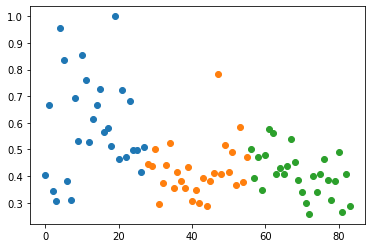

In [12]:
from sklearn.preprocessing import normalize
f_norm = normalize(np.array(features).reshape(-1,1), axis=0, norm='max')
# f_norm = np.array(features).reshape(-1,1)
plt.scatter(range(num_chunck*0,num_chunck*1),f_norm[num_chunck*0:num_chunck*1])
plt.scatter(range(num_chunck*1,num_chunck*2),f_norm[num_chunck*1:num_chunck*2])
plt.scatter(range(num_chunck*2,num_chunck*3),f_norm[num_chunck*2:num_chunck*3])